In [26]:
#import the libraries
import pandas as apd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as mpl

In [41]:
#prepare the data
Max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

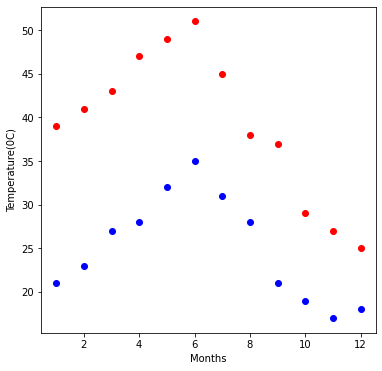

In [47]:
months=np.arange(1,13)
fig=plt.figure(figsize=(6,6))
ax=fig.subplots()
ax.plot(months,Max,'ro')
ax.plot(months,Min,'bo')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature(0C)')
plt.show()

## Task

#### 1.Fitting in to the periodic function

In [55]:
from scipy import optimize
def year_temp(times,avg,ampl,time_offset):
    return(avg+ampl*
           np.cos((times+time_offset)*2*np.pi/times.max()))

res_max,cov_max=optimize.curve_fit(year_temp,months,Max,[20,10,0])
res_min,cov_min=optimize.curve_fit(year_temp,months,Min,[-40,20,0])


#### 2.Plot the fit

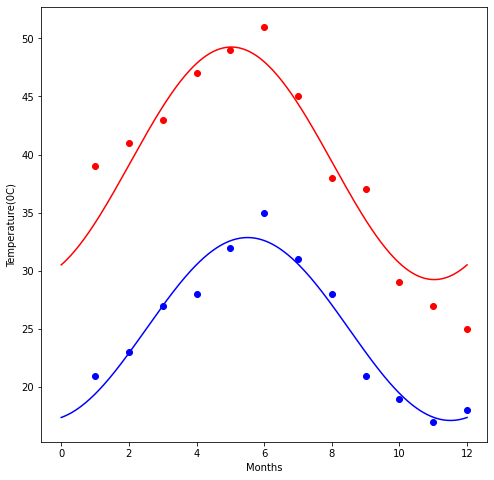

In [56]:
days=np.linspace(0,12,num=365)
plt.figure(figsize=(8,8))
plt.plot(months,Max,'ro')
plt.plot(days,year_temp(days,*res_maxim),'r-')
plt.plot(months,Min,'bo')
plt.plot(days,year_temp(days,*res_min),'b-')
plt.xlabel('Months')
plt.ylabel('Temperature(0C)')
plt.show()

### This assignment is for visualization using matplotlib:

In [57]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


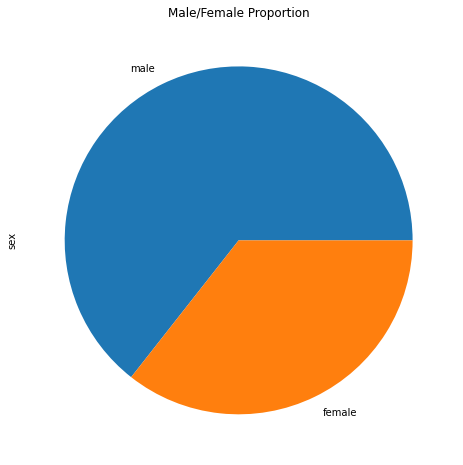

In [80]:
plt.figure(figsize=(8,8))
df['sex'].value_counts().plot.pie()
plt.title('Male/Female Proportion')
plt.show()

In [88]:
gender = df['sex'].astype('category')
gender = gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

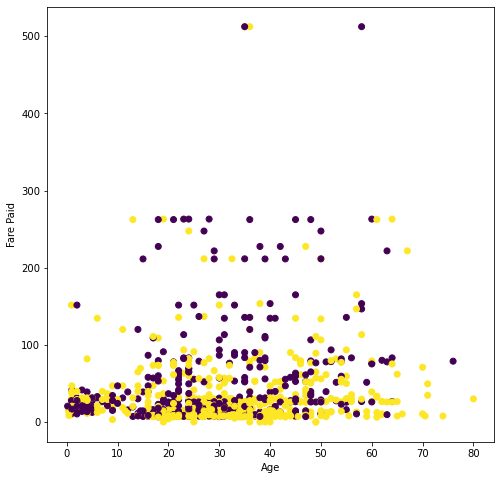

In [90]:
plt.figure(figsize=(8,8))
plt.scatter(df['age'],df['fare'],c =gender)
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.show()